In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [16]:
# Reading the bodyfat.csv file using pandas and storing it in df.
df = pd.read_csv('bodyfat.csv')

In [17]:
# displays first 10 rows of the dataset.
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [18]:
# Information of column data types and count of non-null values in each column of df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [19]:
# returns the number of missing/null values in each column.
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [20]:
# Return the columns names of df
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [21]:
print('Density')
print(df.Density.min()),print(df.Density.max())
print('Age')
print(df['Age'].min(),df['Age'].max())
print('Height')
print(df['Height'].min(),df['Height'].max())
print('Neck')
print(df['Neck'].min(),df['Neck'].max())
print('Ankle')
print(df['Ankle'].min(),df['Ankle'].max())
print('Biceps')
print(df['Biceps'].min(),df['Biceps'].max())
print('Forearm')
print(df['Forearm'].min(),df['Forearm'].max())
print('Wrist')
print(df['Wrist'].min(),df['Wrist'].max())

Density
0.995
1.1089
Age
22 81
Height
29.5 77.75
Neck
31.1 51.2
Ankle
19.1 33.9
Biceps
24.8 45.0
Forearm
21.0 34.9
Wrist
15.8 21.4


# Descriptive Analysis

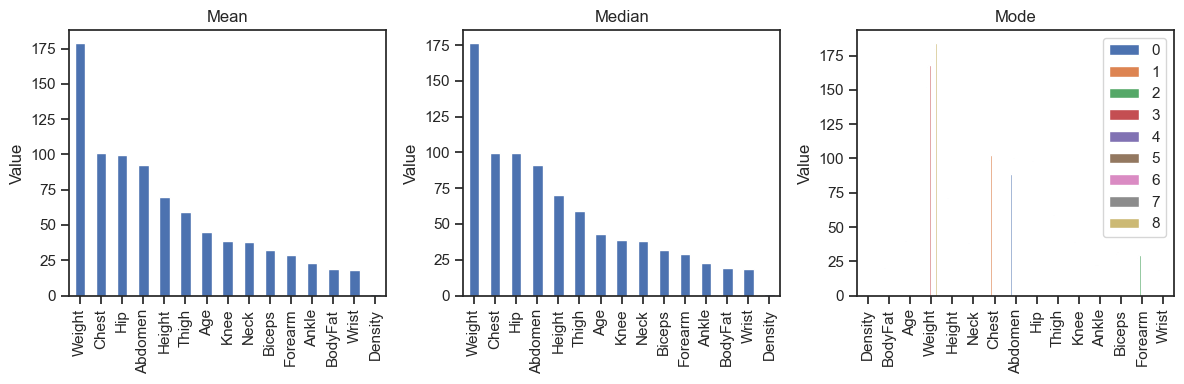

In [22]:
# Plotting subplots for mean, median and mode
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
df.mean().sort_values(ascending=False).plot(kind='bar', ax=axs[0], title='Mean')
df.median().sort_values(ascending=False).plot(kind='bar', ax=axs[1], title='Median')
df.mode().T.plot(kind='bar', ax=axs[2], title='Mode')
for ax in axs.flat:
    ax.set(ylabel='Value')

fig.tight_layout()
plt.show()

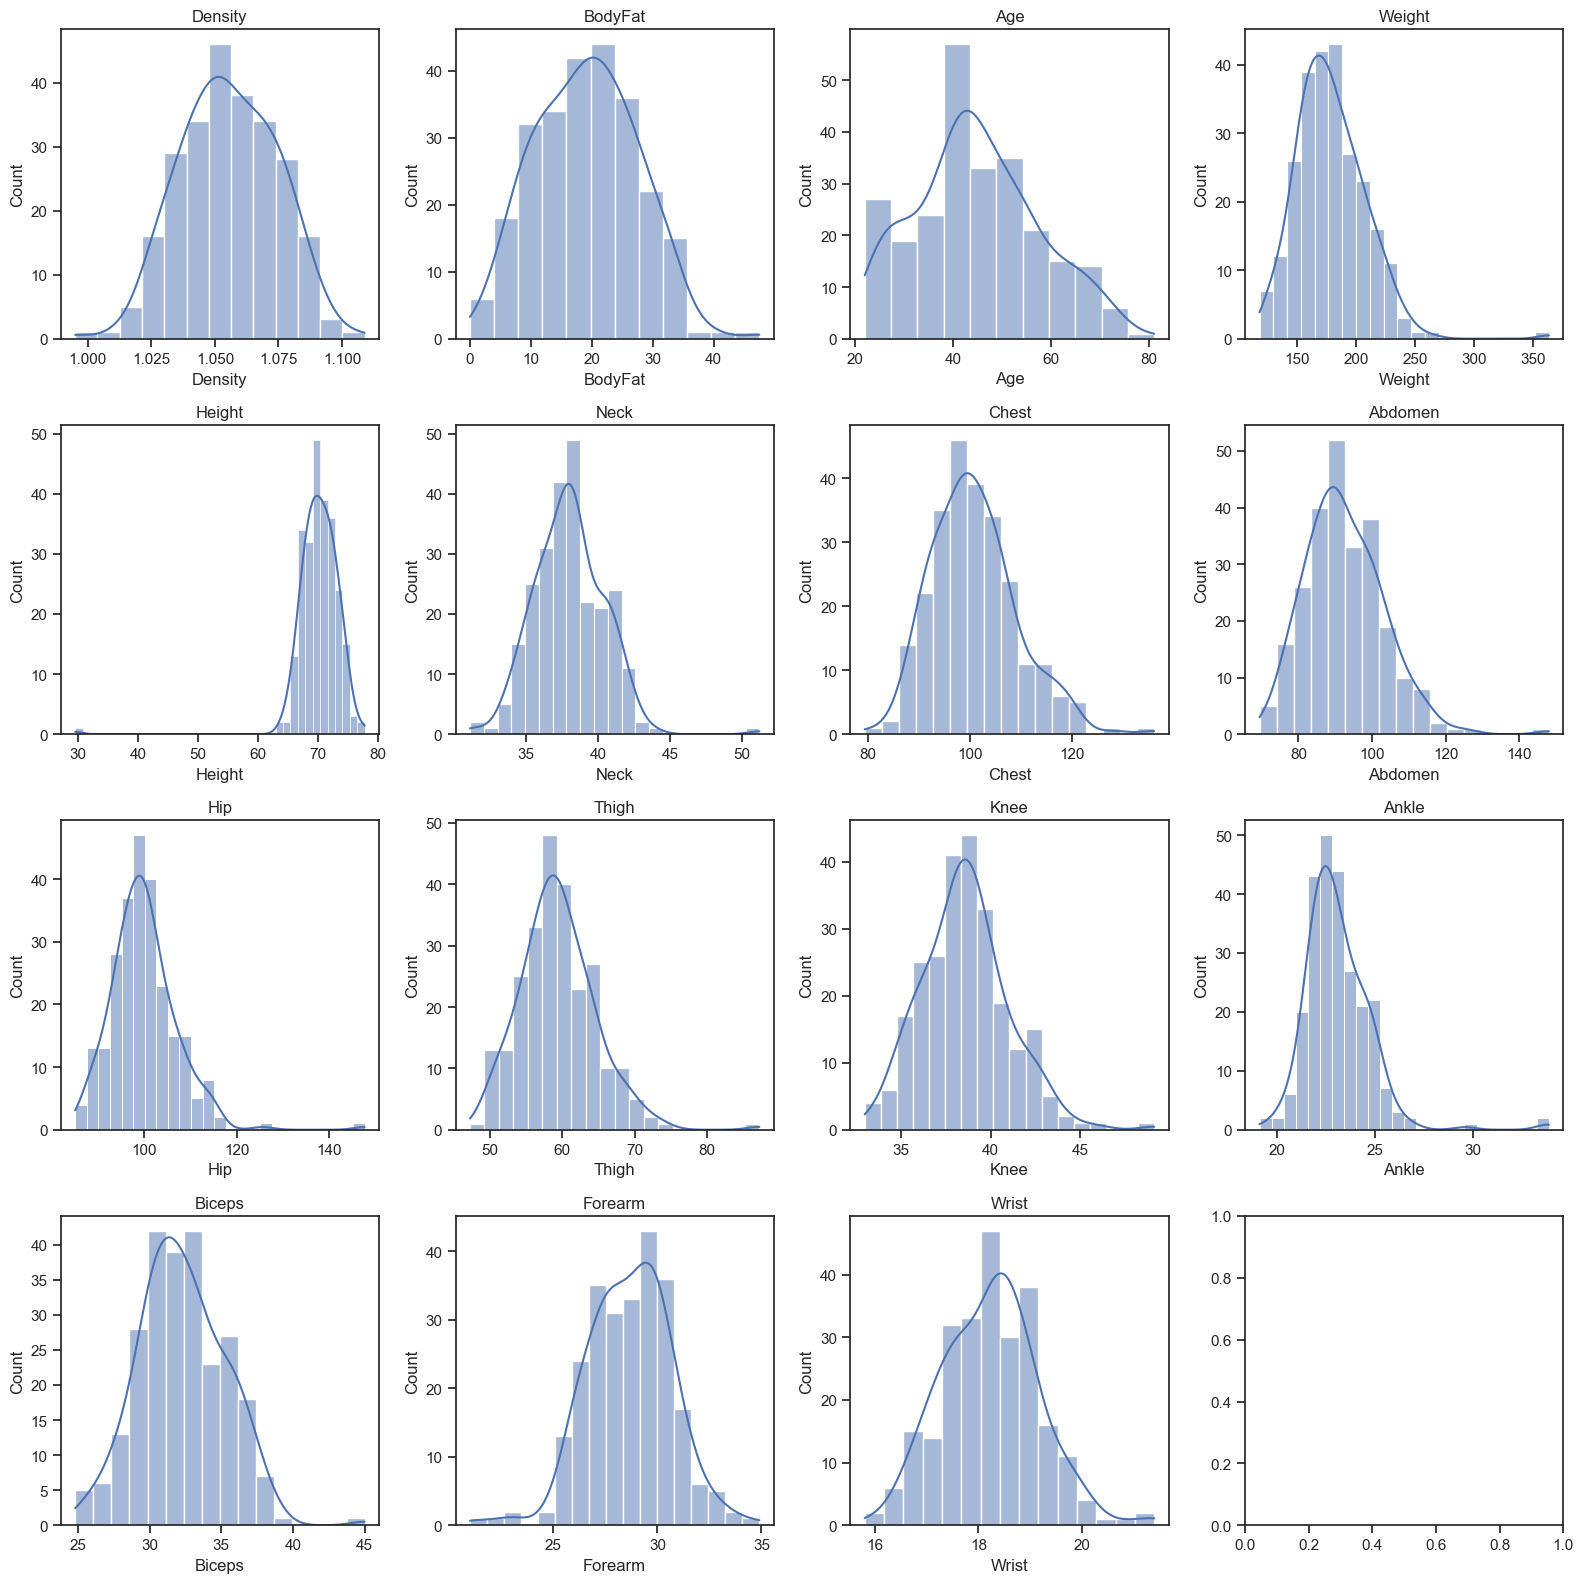

In [23]:
# histgram plot
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axs[i])
    axs[i].set_title(column)
plt.tight_layout()
plt.show()

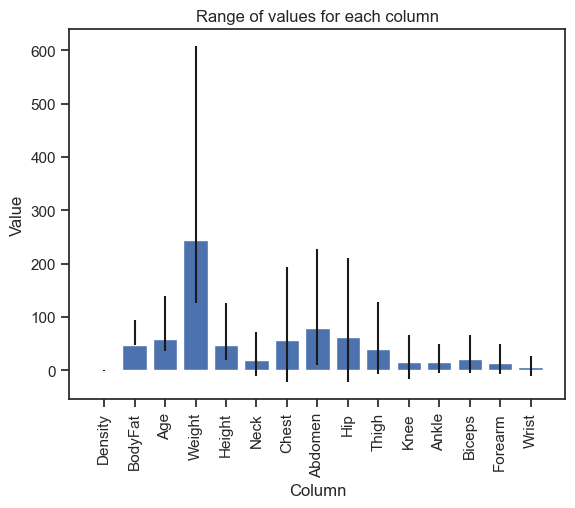

In [24]:
# Plotting the range for each column
ranges = df.max() - df.min()
plt.bar(x=ranges.index, height=ranges.values, yerr=[df.min(), df.max()])
plt.title('Range of values for each column')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

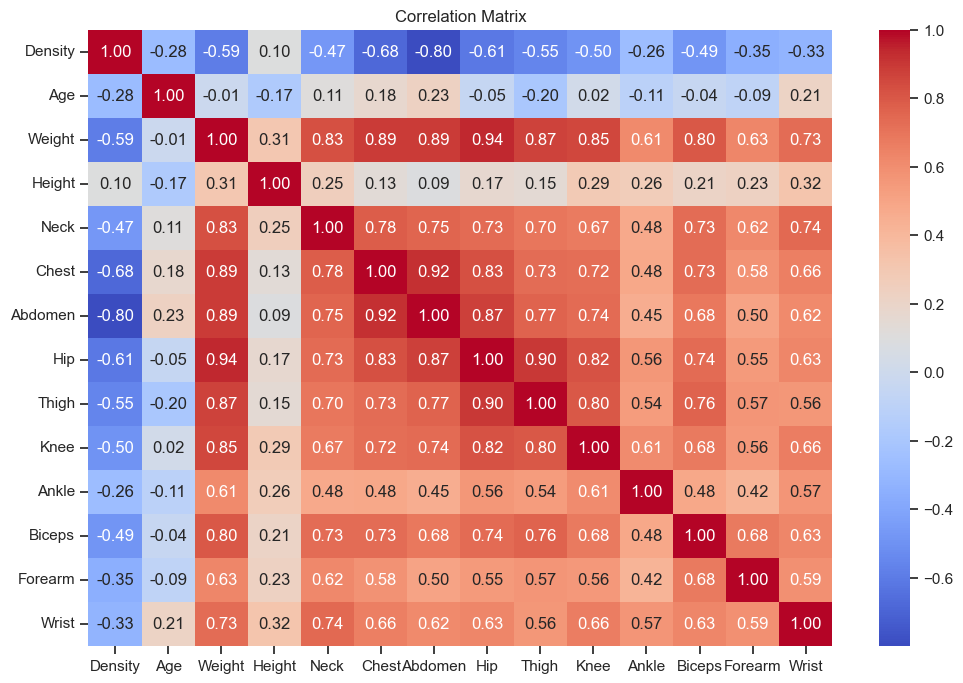

In [25]:
# correlation between columns of the dataframe
df_cor = df.drop('BodyFat', axis=1)
plt.figure(figsize=(12,8))
corr_matrix = df_cor.corr()
sns.heatmap(corr_matrix, annot=True,fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [26]:
# reducing the number of columns based on correlation matrix
threshold = 0.85
corr_mask = (corr_matrix.abs() >= threshold) & (corr_matrix != 1)
cols_to_remove = corr_mask.any()[corr_mask.any() == True].index.tolist()
df_filtered = df.drop(cols_to_remove, axis=1)
df_filtered

,Density,BodyFat,Age,Height,Neck,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,67.75,36.2,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,72.25,38.5,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,66.25,34.0,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,72.25,37.4,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,71.25,34.4,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,67.00,34.9,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,69.75,40.9,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,66.00,38.9,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,70.50,38.9,22.7,30.5,29.4,19.8


c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


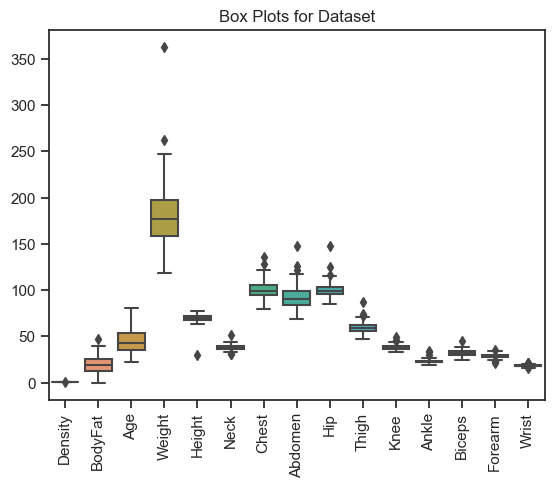

In [27]:
# Boxplot for the columns in the dataset
sns.boxplot(data=df)
plt.title('Box Plots for Dataset')
plt.xticks(rotation=90)
plt.show()

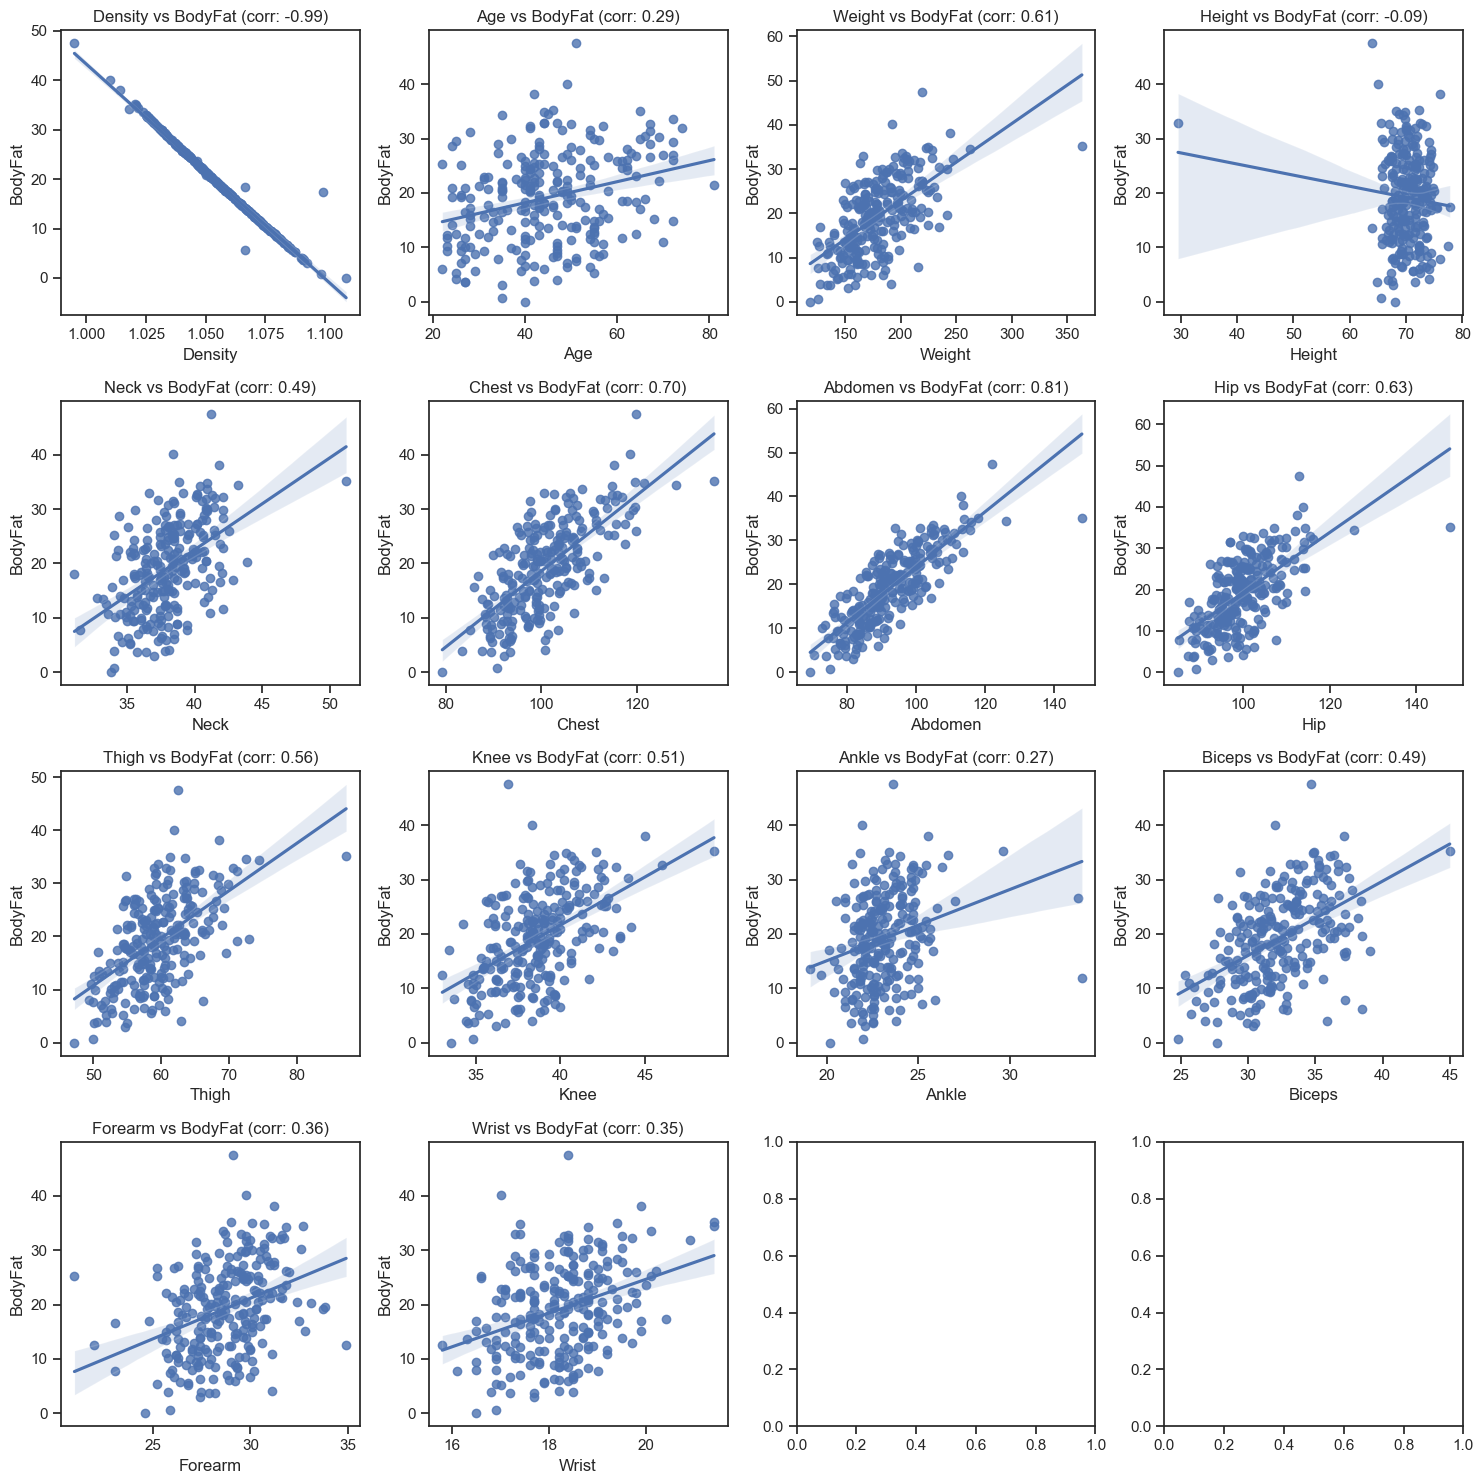

In [28]:
# scatter plot and correlation
sns.set(style="ticks", color_codes=True)

cols = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, col in enumerate(cols):
    if col != 'BodyFat':
        sns.regplot(ax=axes[i//4, i%4], x=col, y='BodyFat', data=df)
        corr_val = df[[col, 'BodyFat']].corr().iloc[0,1]
        axes[i//4, i%4].set_xlabel(col)
        axes[i//4, i%4].set_ylabel('BodyFat')
        axes[i//4, i%4].set_title(f'{col} vs BodyFat (corr: {corr_val:.2f})')
        
plt.tight_layout()
plt.show()

# Buiding the model for Prediction

In [29]:
# X consists of independent variables
X = df_filtered.drop(['BodyFat'],axis=1)
X

,Density,Age,Height,Neck,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,67.75,36.2,21.9,32.0,27.4,17.1
1,1.0853,22,72.25,38.5,23.4,30.5,28.9,18.2
2,1.0414,22,66.25,34.0,24.0,28.8,25.2,16.6
3,1.0751,26,72.25,37.4,22.8,32.4,29.4,18.2
4,1.0340,24,71.25,34.4,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...
247,1.0736,70,67.00,34.9,21.5,25.6,25.7,18.5
248,1.0236,72,69.75,40.9,23.2,35.2,28.6,20.1
249,1.0328,72,66.00,38.9,21.5,31.3,27.2,18.0
250,1.0399,72,70.50,38.9,22.7,30.5,29.4,19.8


In [30]:
# y consist of dependent variable or predictor in our case 'BodyFat'
y = df_filtered['BodyFat']
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 8)
(51, 8)
(201,)
(51,)


# Linear Regression

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
predict_train = lr.predict(X_train)

In [34]:
# training score
error_score_lr_train = r2_score(y_train, predict_train)
print("R2 error is: ", error_score_lr_train)
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

R2 error is:  0.9755418916770192
Root Mean Squared Error: 1.257325293707426


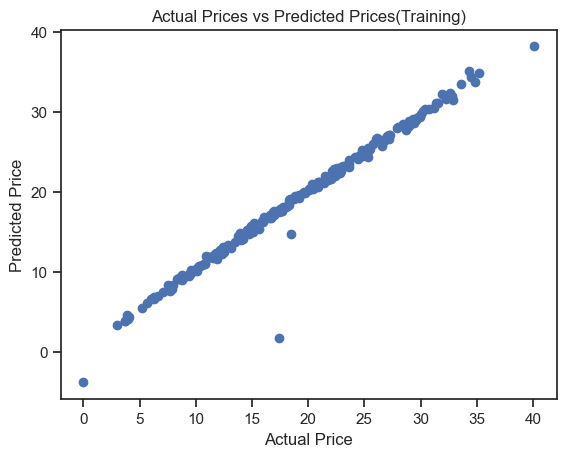

In [35]:
plt.scatter(y_train, predict_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Training)")
plt.show()

In [36]:
predict_test = lr.predict(X_test)

In [37]:
# testing score
error_score_lr_test = r2_score(y_test, predict_test)
print("R2 error is: ", error_score_lr_test)
mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)

R2 error is:  0.9790607787560995
Root Mean Squared Error: 1.36407493124042


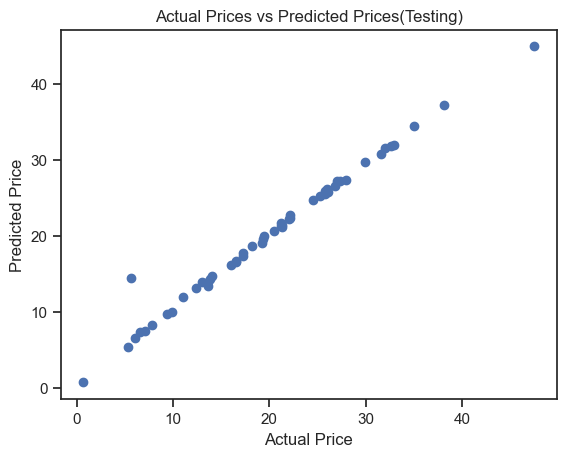

In [38]:
plt.scatter(y_test, predict_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Testing)")
plt.show()

# Random Forest Regressor

In [39]:
rfr = RandomForestRegressor(n_estimators = 50,
                             max_depth = 8,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [40]:
predict_train_rfr = rfr.predict(X_train)

In [41]:
# training score
error_score_rfr_train = r2_score(y_train, predict_train_rfr)
print("R2 error is: ", error_score_rfr_train)
mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)

R2 error is:  0.9791632855075582
Root Mean Squared Error: 1.1605152207369323


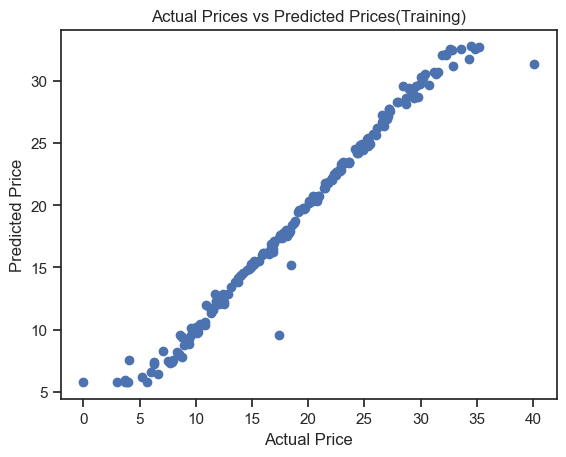

In [42]:
plt.scatter(y_train, predict_train_rfr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Training)")
plt.show()

In [43]:
predict_test_rfr = rfr.predict(X_test)

In [44]:
# testing score
error_score_rfr_test = r2_score(y_test, predict_test_rfr)
print("R2 error is: ", error_score_rfr_test)
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)

R2 error is:  0.9149508261501245
Root Mean Squared Error: 2.74911567696938


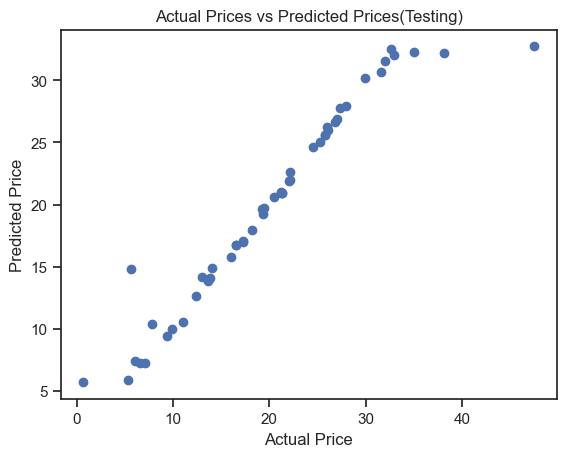

In [45]:
plt.scatter(y_test, predict_test_rfr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Testing)")
plt.show()

# Decision Tree Regressor

In [46]:
dtr = DecisionTreeRegressor(max_depth= 8, min_samples_split= 4, min_samples_leaf= 4)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=4)

In [47]:
predict_train_dtr = dtr.predict(X_train)

In [48]:
# training score
error_score_dtr_train = r2_score(y_train, predict_train_dtr)
print("R2 error is: ", error_score_dtr_train)
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)

R2 error is:  0.9882253508391287
Root Mean Squared Error: 0.8723890547663329


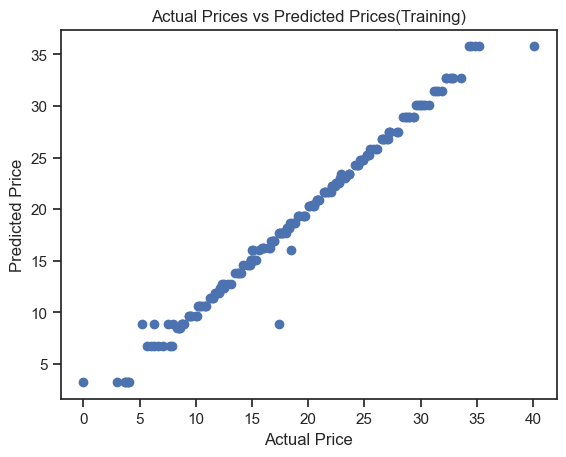

In [49]:
plt.scatter(y_train, predict_train_dtr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Training)")
plt.show()

In [50]:
predict_test_dtr = dtr.predict(X_test)

In [51]:
# testing score
error_score_dtr_test = r2_score(y_test, predict_test_dtr)
print("R2 error is: ", error_score_dtr_test)
mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)

R2 error is:  0.9410853419944457
Root Mean Squared Error: 2.288071782599108


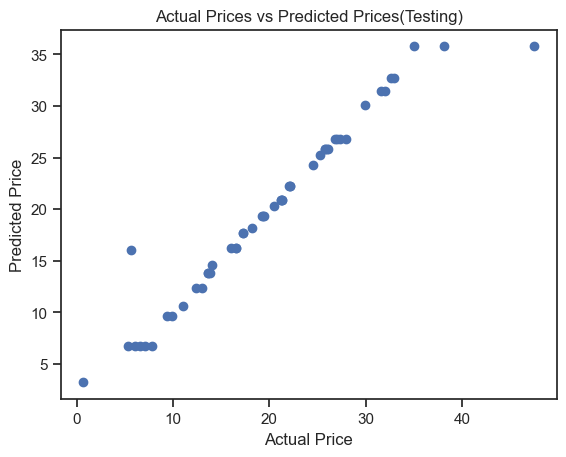

In [52]:
plt.scatter(y_test, predict_test_dtr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Testing)")
plt.show()

# Gradient Boosting Regressor

In [53]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [54]:
predict_train_gbr = gbr.predict(X_train)

In [55]:
# training score
error_score_gbr_train = r2_score(y_train, predict_train_gbr)
print("R2 error is: ", error_score_gbr_train)
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)

R2 error is:  0.9951010206422864
Root Mean Squared Error: 0.5627156906172873


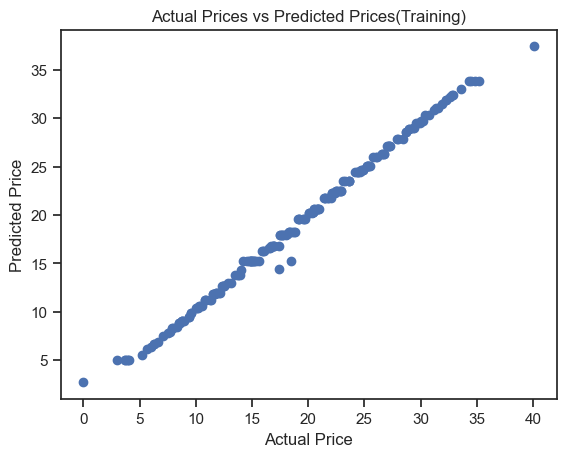

In [56]:
plt.scatter(y_train, predict_train_gbr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Training)")
plt.show()

In [57]:
predict_test_gbr = gbr.predict(X_test)

In [58]:
# testing score
error_score_gbr_test = r2_score(y_test, predict_test_gbr)
print("R2 error is: ", error_score_gbr_test)
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

R2 error is:  0.9510009062359859
Root Mean Squared Error: 2.086661430442402


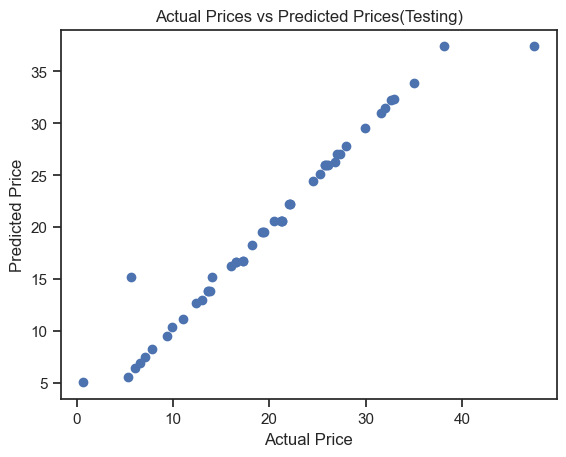

In [59]:
plt.scatter(y_test, predict_test_gbr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices(Testing)")
plt.show()

In [60]:
results = pd.DataFrame(columns=['Model', 'Training R2', 'Testing R2', 'Training RMSE', 'Testing RMSE'])
results.loc[0] = ['Linear Regression', error_score_lr_train, error_score_lr_test, rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', error_score_dtr_train, error_score_dtr_test, rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', error_score_rfr_train, error_score_rfr_test, rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', error_score_gbr_train, error_score_gbr_test, rmse_gbr_train, rmse_gbr_test]

print(results)

                         Model  Training R2  Testing R2  Training RMSE  \
0            Linear Regression     0.975542    0.979061       1.257325   
1      Decision Tree Regressor     0.988225    0.941085       0.872389   
2      Random Forest Regressor     0.979163    0.914951       1.160515   
3  Gradient Boosting Regressor     0.995101    0.951001       0.562716   

   Testing RMSE  
0      1.364075  
1      2.288072  
2      2.749116  
3      2.086661  


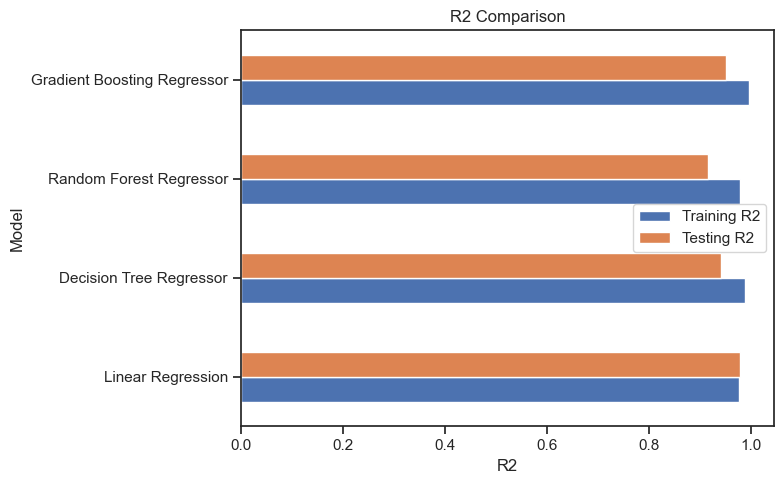

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
results.plot(x='Model', y=['Training R2', 'Testing R2'], kind='barh', ax=ax)
ax.set_xlabel('R2')
ax.set_title('R2 Comparison')
plt.tight_layout()
plt.show()

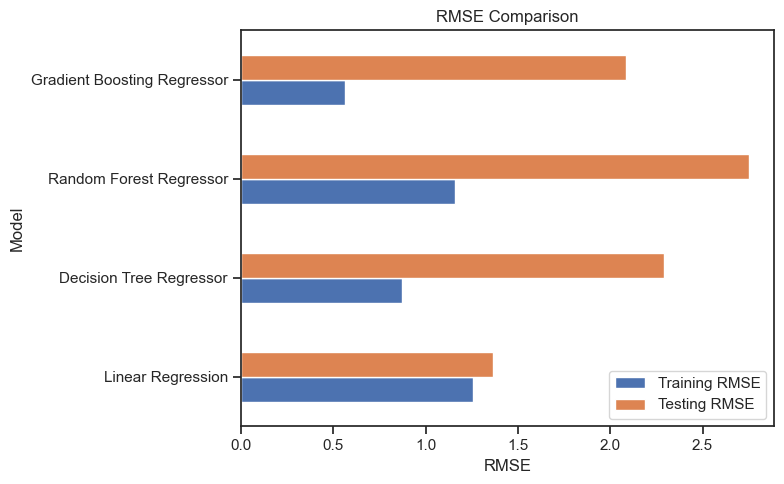

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
results.plot(x='Model', y=['Training RMSE', 'Testing RMSE'], kind='barh', ax=ax)
ax.set_xlabel('RMSE')
ax.set_title('RMSE Comparison')
plt.tight_layout()
plt.show()

# We can clearly see from the above graphs that Linear Regression performs the best among the 4 models.

In [63]:
# dumping the selected model
pickle.dump(lr,open('bodyfat.pkl','wb'))